## Import Datasets

In [5]:
!python.exe -m pip install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3
    Uninstalling pip-23.3:
      Successfully uninstalled pip-23.3


In [7]:
!pip install pydub

  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)


In [9]:
!pip install librosa

  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 23.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 24.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ------- -------------------------------- 6.0/30.3 MB 28.4 MB/s eta 0:00:01
   --------------- ------------------------ 11.8/30.3 MB 27.3 MB/s eta 0:00:01
   ----------------------- ---------------- 17.8/30.3 MB 28.1 MB/s eta 0:00:01
   -------------------------------- ------- 24.9/30.3 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------  30.1/30.3 MB 29.9 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 26.7 MB/s eta 0:00:00


In [11]:
!pip install audiomentations

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---- ----------------------------------- 5.8/46.2 MB 27.1 MB/s eta 0:00:02
   ---------- ----------------------------- 12.1/46.2 MB 29.1 MB/s eta 0:00:02
   ---------------- ----------------------- 18.9/46.2 MB 29.8 MB/s eta 0:00:01
   ---------------------- ----------------- 26.2/46.2 MB 30.7 MB/s eta 0:00:01
   ----------------------------- ---------- 33.6/46.2 MB 31.3 MB/s eta 0:00:01
   ----------------------------------- ---- 40.9/46.2 MB 32.1 MB/s eta 0:00:01
   ---------------------------------------  46.1/46.2 MB 31.9 MB/s eta 0:00:01
   ---------------------------------------- 46.2/46.2 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [6]:
import pandas as pd
import numpy as np
import os
import numpy as np
from pydub import AudioSegment
from pydub.utils import mediainfo

animal_name_translation = {'cat':'cat',
                          'dog':'dog',
                          'aslan':'lion',
                          'esek':'donkey',
                          'inek':'cow',
                          'koyun':'baby sheep',
                          'kurbaga':'frog',
                          'Kus':'bird',
                          'maymun':'monkey',
                          'tavuk':'chicken'}

# Define a custom class to store audio data
class AudioFile:
    def __init__(self, file_name, audio_data, sample_rate, label):
        self.file_name = file_name   # Unique Identifier
        self.audio_data = audio_data
        self.sample_rate = sample_rate
        self.label = label

    def __repr__(self):
        return f"AudioFile(file_name={self.file_name}, label={self.label}, sample_rate={self.sample_rate}, audio_data_shape={self.audio_data.shape})"

# Path to the folder containing .wav files
folder_path = "audio_data"

wav_files = []

# List all .wav files in the folder
for folder in os.listdir(folder_path):
    for file in os.listdir(f"{folder_path}\\{folder}"):
        if file.endswith('.wav'):
            wav_files.append(f"{folder}\\{file}")

# Create a list to store AudioFile objects
audio_objects = []

# Load each .wav or .mp3 file and store as an AudioFile object
for wav_file in wav_files:
    file_path = os.path.join(folder_path, wav_file)
    #print(f"Loading {file_path}")

    # Use pydub to read the audio file
    audio = AudioSegment.from_file(file_path)
    y = np.array(audio.get_array_of_samples())  # Convert to numpy array
    y = y.astype(np.float32) / (2**15)  # Normalize to [-1, 1] for 16-bit PCM
    sr = audio.frame_rate  # Get sample rate

    #print(f"Loaded {wav_file} with sample rate {sr} and {len(y)} samples")

    # Extract label from the folder name
    filename = os.path.basename(file_path)
    label = animal_name_translation[filename.split('_')[0]]

    # Create an AudioFile object and store it
    audio_objects.append(AudioFile(wav_file, y, sr, label))

# Check every 100th audio object
for audio_object in audio_objects[::100]:
    print(audio_object)

AudioFile(file_name=Aslan\aslan_1.wav, label=lion, sample_rate=22050, audio_data_shape=(198592,))
AudioFile(file_name=cats_dogs\cat_154.wav, label=cat, sample_rate=16000, audio_data_shape=(162816,))
AudioFile(file_name=cats_dogs\cat_94.wav, label=cat, sample_rate=16000, audio_data_shape=(190400,))
AudioFile(file_name=cats_dogs\dog_barking_82.wav, label=dog, sample_rate=16000, audio_data_shape=(52693,))
AudioFile(file_name=Kedi-Part1\cat_100.wav, label=cat, sample_rate=16000, audio_data_shape=(20696,))
AudioFile(file_name=Kedi-Part2\cat_103.wav, label=cat, sample_rate=16000, audio_data_shape=(192000,))
AudioFile(file_name=Kopek-Part1\dog_22.wav, label=dog, sample_rate=16000, audio_data_shape=(45302,))
AudioFile(file_name=Kopek-Part2\dog_122.wav, label=dog, sample_rate=11025, audio_data_shape=(45820,))
AudioFile(file_name=Kus-Part1\Kus_28.wav, label=bird, sample_rate=44100, audio_data_shape=(44100,))
AudioFile(file_name=Kus-Part2\Kus_122.wav, label=bird, sample_rate=44100, audio_data_sha

## Visualize Waveform

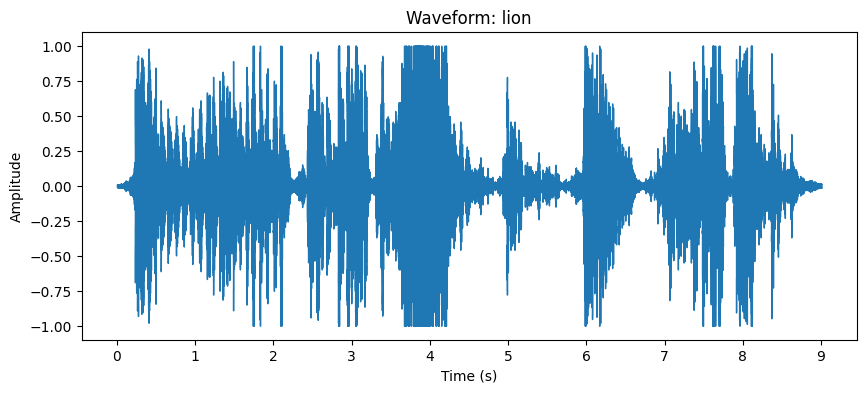

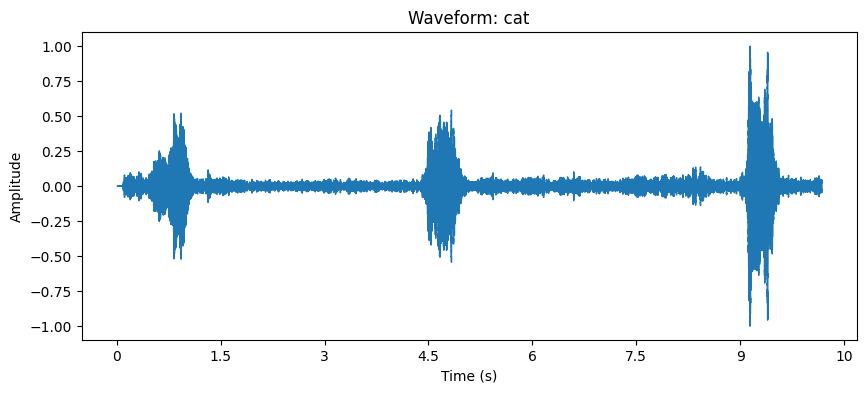

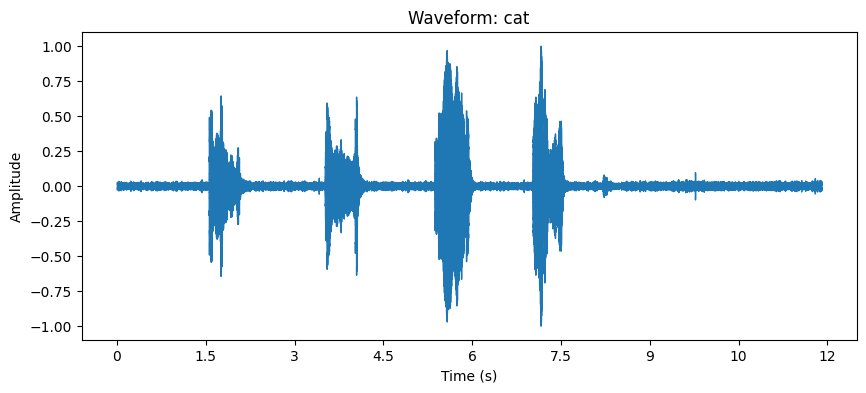

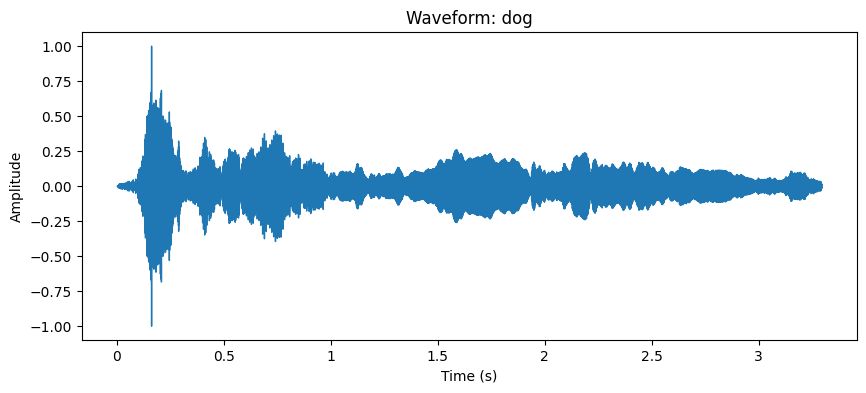

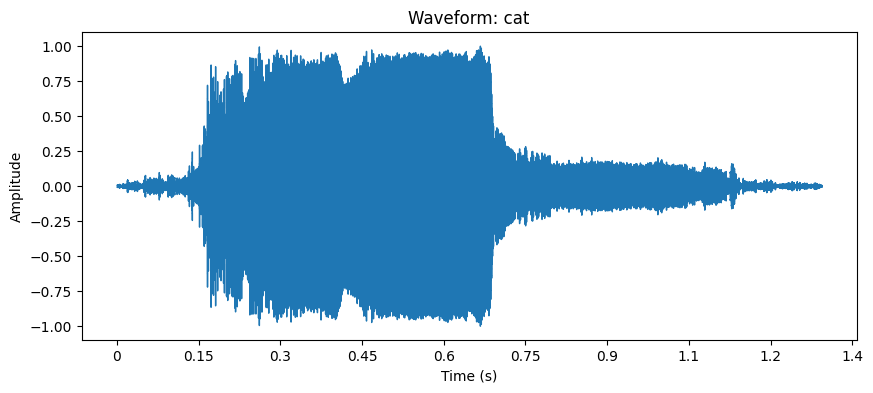

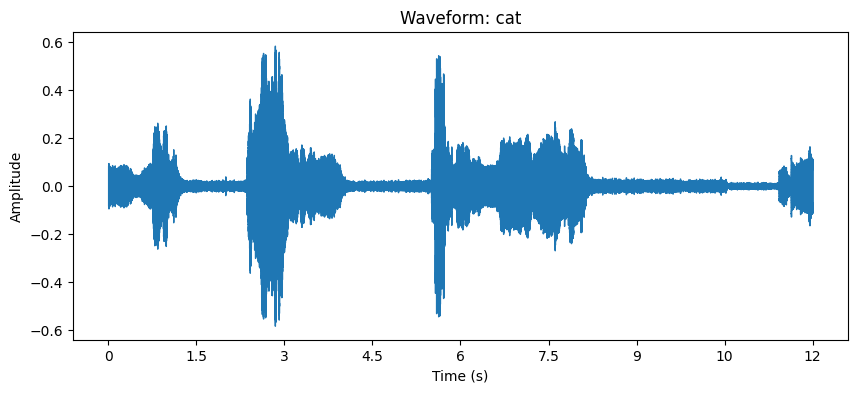

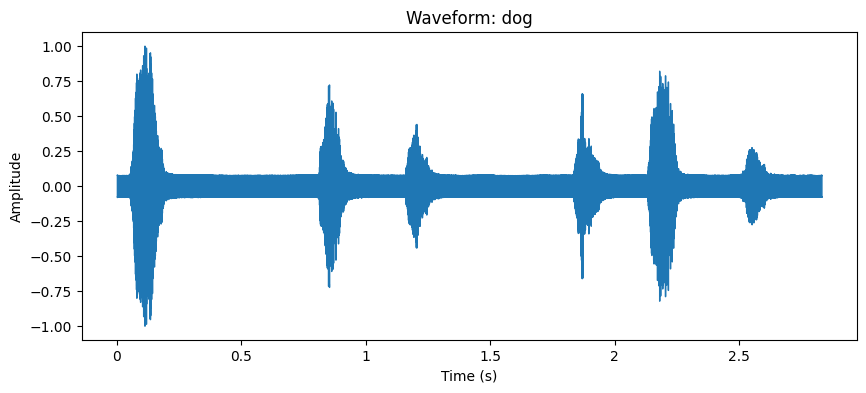

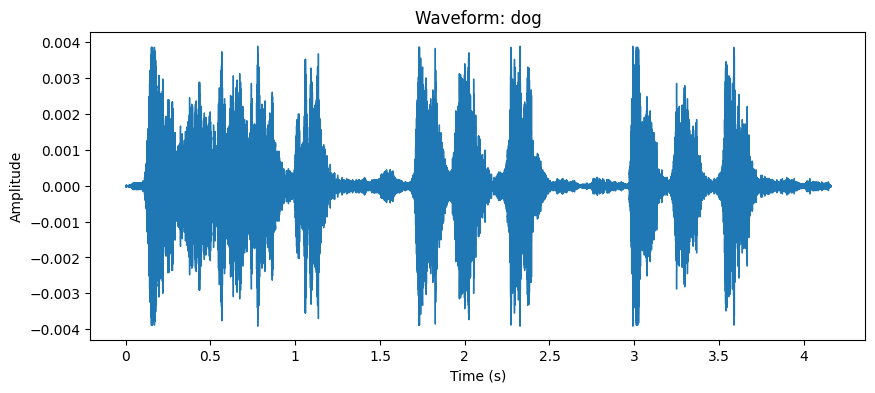

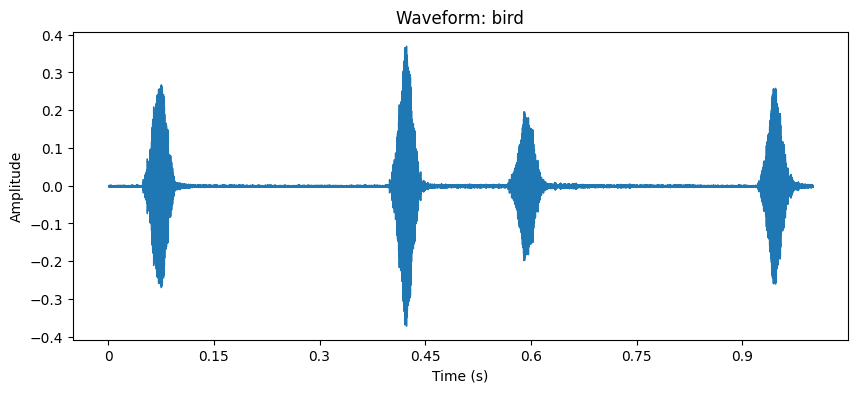

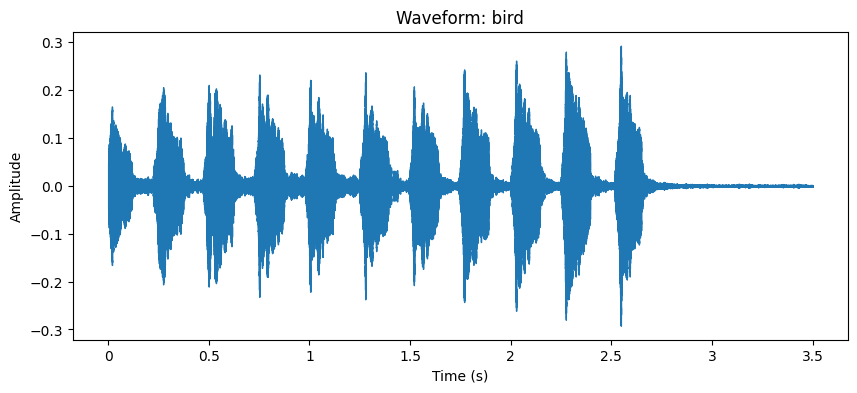

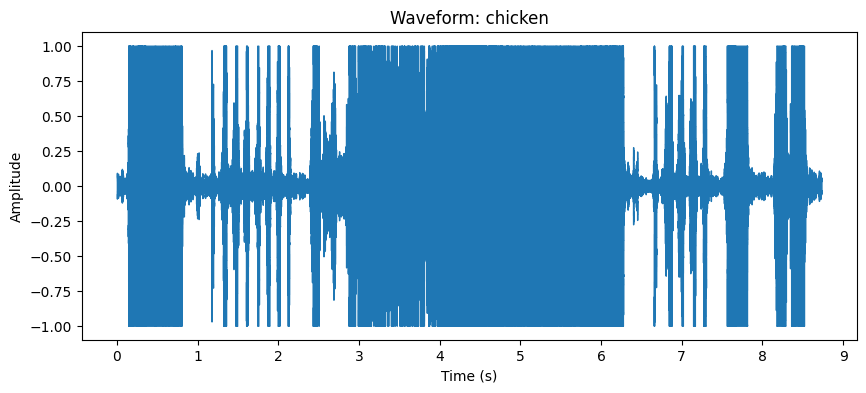

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Sample every 100th audio object
for sample in audio_objects[::100]:
    y = sample.audio_data
    sr = sample.sample_rate
    
    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform: {sample.label}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

## Data Preprocessing
Goals:<br>
(1) Convert list of audio files into a dataframe<br>
(2) Extract MFCC<br>
(3) Split train/test<br>

### Convert list of AudioFile objects into dataframe

In [8]:
# Features of interest:
# (file_name, label, audio_data, sample_rate)

# Convert to DataFrame
data = {
    "file_name": [audio_object.file_name for audio_object in audio_objects],
    "audio_data": [audio_object.audio_data for audio_object in audio_objects],
    "sample_rate": [audio_object.sample_rate for audio_object in audio_objects],
    "label": [audio_object.label for audio_object in audio_objects]
}

audio_df = pd.DataFrame(data)

# Display the DataFrame
print(audio_df)

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1008  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1009  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1010   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1011   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1012   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label  
0           22050     

In [14]:
audio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_name    1013 non-null   object
 1   audio_data   1013 non-null   object
 2   sample_rate  1013 non-null   int64 
 3   label        1013 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.8+ KB


### Mel Spectrogram

In [9]:
import librosa
import numpy as np

def generate_mel_spectrogram(audio_data, sr=22050, n_mels=128, fmax=8000, hop_length=512, win_length=1024):
    S = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=n_mels, fmax=fmax, hop_length=hop_length, win_length=win_length)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB

# Generate Mel spectrograms for all audio data in the DataFrame
audio_df['mel_spectrogram'] = audio_df['audio_data'].apply(lambda x: generate_mel_spectrogram(np.array((x))))

In [10]:
# Define a fixed number of frames
max_frames = 100  # Adjust based on your dataset

# Function to pad or truncate
def pad_or_truncate(spec, max_frames):
    if spec.shape[1] < max_frames:
        # Pad with zeros
        padding = ((0, 0), (0, max_frames - spec.shape[1]))
        return np.pad(spec, padding, mode='constant')
    else:
        # Truncate
        return spec[:, :max_frames]

# Apply padding/truncation
audio_df["spectrogram_fixed"] = audio_df["mel_spectrogram"].apply(lambda spec: pad_or_truncate(spec, max_frames))

# Flatten the fixed-length
spec_flattened = [spec.flatten() for spec in audio_df["spectrogram_fixed"]]

# Create a DataFrame with flattened features
spec_columns = [f"spec_{i}" for i in range(max_frames * 128)]
df_spec = pd.concat([audio_df, pd.DataFrame(spec_flattened, columns=spec_columns)], axis=1)

df_spec = df_spec.drop(columns=["mel_spectrogram", "spectrogram_fixed"])

# Display the DataFrame
print(df_spec)

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1008  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1009  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1010   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1011   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1012   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label     spec_0     spec_1   

In [11]:
from sklearn.preprocessing import StandardScaler

# Select only the Spec columns
spec_columns = [col for col in df_spec.columns if col.startswith("spec_")]
spec_data = df_spec[spec_columns]

# Normalize using Standardization
scaler = StandardScaler()
spec_normalized = scaler.fit_transform(spec_data)

# Replace the original Spec columns with normalized values
df_spec[spec_columns] = spec_normalized

# Display the DataFrame
print(df_spec.head())

            file_name                                         audio_data  \
0   Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1  Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3  Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4  Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   

   sample_rate label    spec_0    spec_1    spec_2    spec_3    spec_4  \
0        22050  lion  0.727722  0.518486  0.337280  0.020162 -0.174803   
1        11025  lion  0.746909  0.544771  0.512792  0.767887  0.648546   
2        11025  lion  0.910972  0.912046  0.658911  0.628510  0.641093   
3        11025  lion  2.069166  1.962673  1.796961  1.721306  1.724231   
4        11025  lion -0.122356 -0.161139 -0.406763 -0.512097 -0.408717   

     spec_5  ...  spec_12790  spec_12791  spec_12792  spec_12793  spec_12794  \
0 -0.693044  ...  

In [12]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Identify the maximum number of samples per label
max_samples = df_spec['label'].value_counts().max()

# Step 2: Upsample the minority classes
balanced_df = pd.DataFrame()

for label in df_spec['label'].unique():
    # Filter the DataFrame by label
    label_df = df_spec[df_spec['label'] == label]
    
    # Upsample the minority classes
    if len(label_df) < max_samples:
        label_df = resample(label_df, 
                            replace=True,  # Sample with replacement
                            n_samples=max_samples,  # Match the majority class
                            random_state=42)  # For reproducibility
    
    # Append the upsampled DataFrame to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, label_df])

# Shuffle the DataFrame to ensure randomness
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now balanced_df has an equal number of samples for each label

balanced_df

,file_name,audio_data,sample_rate,label,spec_0,spec_1,spec_2,spec_3,spec_4,spec_5,...,spec_12790,spec_12791,spec_12792,spec_12793,spec_12794,spec_12795,spec_12796,spec_12797,spec_12798,spec_12799
0,Tavuk\tavuk_6.wav,"[0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...",22050,chicken,0.749766,0.829608,0.651407,0.563133,0.464100,0.582735,...,-0.336305,-0.317460,-0.133744,-0.064442,-0.240211,-0.301450,-0.311994,-0.432833,-0.328063,-0.354361
1,Aslan\aslan_39.wav,"[0.0, 0.0, 0.0, 0.0, -9.1552734e-05, 6.1035156...",11025,lion,1.570030,1.488072,1.301421,1.229704,1.222483,1.190291,...,-0.569985,-0.597644,-0.570535,-0.399488,-0.441983,-0.512450,-0.602002,-0.700860,-0.821329,-0.966366
2,Kus-Part2\Kus_113.wav,"[-0.04067993, -0.027008057, -0.031982422, -0.0...",44100,bird,2.147041,1.855025,1.809399,1.711667,1.616831,1.759792,...,-0.317599,-0.295672,-0.291525,-0.381728,-0.428720,-0.390655,-0.443841,-0.407739,-0.433455,-0.448993
3,Kedi-Part1\cat_85.wav,"[0.003967285, 0.006072998, 0.0087890625, 0.012...",16000,cat,-0.431563,-0.582043,-0.769101,-0.580745,-0.723515,-0.500978,...,1.268361,1.257483,1.251581,1.238775,1.226533,1.222909,1.204617,1.188766,1.185608,1.180927
4,Kopek-Part1\dog_18.wav,"[-0.0058288574, -0.0037841797, 0.015533447, 0....",16000,dog,-0.978436,-1.395437,-1.665655,-1.692911,-1.764100,-1.744198,...,-0.284103,-0.293181,-0.290728,-0.226638,-0.221853,-0.448981,-0.375434,-0.424689,-0.365228,-0.198806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,Esek\esek_19.wav,"[6.1035156e-05, 9.1552734e-05, 6.1035156e-05, ...",11025,donkey,0.392318,0.467520,0.233013,0.173553,0.224709,0.221715,...,1.268361,1.257483,1.251581,1.238775,1.226533,1.222909,1.204617,1.188766,1.185608,1.180927
3506,Esek\esek_16.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025,donkey,0.728875,0.827076,0.674837,0.651394,0.602389,0.596345,...,1.268361,1.257483,1.251581,1.238775,1.226533,1.222909,1.204617,1.188766,1.185608,1.180927
3507,Kopek-Part2\dog_105.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,dog,-1.350806,-1.254546,-1.522930,0.313518,-0.586098,-0.625882,...,1.268361,1.257483,1.251581,1.238775,1.226533,1.222909,1.204617,1.188766,1.185608,1.180927
3508,Tavuk\tavuk_1.wav,"[-0.0054016113, -0.009002686, -0.010803223, -0...",48000,chicken,0.677702,0.310462,-0.202856,-0.058287,-0.284355,0.290026,...,-1.052221,-1.058722,-1.068870,-1.072536,-1.079884,-1.095245,-1.100519,-1.104730,-1.103248,-1.103840


In [ ]:
from audiomentations import TimeStretch, PitchShift, Compose

# Define augmentation pipeline
augmenter = Compose([
    TimeStretch(min_rate=0.9, max_rate=1.1, p=1.0),
    PitchShift(min_semitones=-2, max_semitones=2, p=1.0)
])

def augment_audio(audio_data, sample_rate):
    # Apply augmentation
    augmented_audio = augmenter(samples=audio_data, sample_rate=sample_rate)
    return augmented_audio

# Apply augmentation to the audio data
balanced_df['audio_data'] = balanced_df.apply(lambda row: augment_audio(row['audio_data'], row['sample_rate']), axis=1)

In [20]:
balanced_df.to_csv('audio_data3_spectrogram.csv', index=False)

### MFCC

In [13]:
# Function to extract MFCC features
def extract_mfcc(audio_data, sample_rate, n_mfcc=13):
    return librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc)

# Add MFCC features to the DataFrame
audio_df["mfcc"] = audio_df.apply(lambda row: extract_mfcc(row["audio_data"], row["sample_rate"]), axis=1)

# Display the DataFrame
print(audio_df)

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1008  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1009  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1010   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1011   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1012   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label                         

In [14]:
# Flatten MFCC features into separate columns
mfcc_flattened = [mfcc.flatten() for mfcc in audio_df["mfcc"]]

# Determine the maximum number of MFCC coefficients
max_mfcc_length = max(len(mfcc) for mfcc in mfcc_flattened)

# Create a DataFrame with flattened MFCC features
mfcc_columns = [f"mfcc_{i}" for i in range(max_mfcc_length)]
mfcc_data = {col: [] for col in mfcc_columns}

for mfcc in mfcc_flattened:
    for i, value in enumerate(mfcc):
        mfcc_data[f"mfcc_{i}"].append(value)
    # Pad with NaN if necessary
    for i in range(len(mfcc), max_mfcc_length):
        mfcc_data[f"mfcc_{i}"].append(np.nan)

# Add flattened MFCC features to the original DataFrame
df_mfcc = pd.concat([audio_df, pd.DataFrame(mfcc_data)], axis=1)

# Drop the original "mfcc" column (optional)
df_mfcc = df_mfcc.drop(columns=["mfcc"])

# Display the DataFrame
print(df_mfcc)
print(df_mfcc.info())

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1008  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1009  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1010   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1011   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1012   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label                         

Flattened mfcc had 7305 columns, which are full of NaN near the end. <br>
Solution: truncate flattened mfcc

In [15]:
import numpy as np

# Define a fixed number of frames
max_frames = 100  # Adjust based on your dataset

# Function to pad or truncate MFCCs
def pad_or_truncate(mfcc, max_frames):
    if mfcc.shape[1] < max_frames:
        # Pad with zeros
        padding = ((0, 0), (0, max_frames - mfcc.shape[1]))
        return np.pad(mfcc, padding, mode='constant')
    else:
        # Truncate
        return mfcc[:, :max_frames]

# Apply padding/truncation to MFCCs
audio_df["mfcc_fixed"] = audio_df["mfcc"].apply(lambda mfcc: pad_or_truncate(mfcc, max_frames))

# Flatten the fixed-length MFCCs
mfcc_flattened = [mfcc.flatten() for mfcc in audio_df["mfcc_fixed"]]

# Create a DataFrame with flattened MFCC features
mfcc_columns = [f"mfcc_{i}" for i in range(max_frames * 13)]  # 13 is the default number of MFCCs
df_mfcc = pd.concat([audio_df, pd.DataFrame(mfcc_flattened, columns=mfcc_columns)], axis=1)

# Drop the original "mfcc" and "mfcc_fixed" columns (optional)
df_mfcc = df_mfcc.drop(columns=["mfcc", "mfcc_fixed"])

# Display the DataFrame
print(df_mfcc)

               file_name                                         audio_data  \
0      Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1     Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3     Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4     Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   
...                  ...                                                ...   
1008  Tavuk\tavuk_27.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1009  Tavuk\tavuk_28.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1010   Tavuk\tavuk_3.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05,...   
1011   Tavuk\tavuk_6.wav  [0.0, -3.0517578e-05, -3.0517578e-05, -3.05175...   
1012   Tavuk\tavuk_7.wav  [-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...   

      sample_rate    label                         

### Normalization

In [16]:
from sklearn.preprocessing import StandardScaler

# Select only the MFCC columns
mfcc_columns = [col for col in df_mfcc.columns if col.startswith("mfcc_")]
mfcc_data = df_mfcc[mfcc_columns]

# Normalize using Standardization
scaler = StandardScaler()
mfcc_normalized = scaler.fit_transform(mfcc_data)

# Replace the original MFCC columns with normalized values
df_mfcc[mfcc_columns] = mfcc_normalized

# Display the DataFrame
print(df_mfcc.head())

            file_name                                         audio_data  \
0   Aslan\aslan_1.wav  [0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....   
1  Aslan\aslan_10.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  Aslan\aslan_11.wav  [-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...   
3  Aslan\aslan_12.wav  [0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...   
4  Aslan\aslan_13.wav  [-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...   

   sample_rate label                                    mel_spectrogram  \
0        22050  lion  [[-38.314354, -39.28208, -38.631733, -44.11575...   
1        11025  lion  [[-37.92955, -38.72288, -35.006733, -28.45294,...   
2        11025  lion  [[-34.639206, -30.909267, -31.988811, -31.3725...   
3        11025  lion  [[-11.41119, -8.557603, -8.483732, -8.481405, ...   
4        11025  lion  [[-55.362976, -53.740826, -53.99907, -55.26514...   

                                   spectrogram_fixed    mfcc_0    mfcc_1  \
0  [[-38.314354,

### Write into CSV file

In [17]:
df_mfcc.to_csv('audio_data2.csv', index=False)

## Data Augmentation

Before expanding our dataset, create a test set (20%)

In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Split into training and temporary set (e.g., 70% training, 30% temporary)
train_df, temp_df = train_test_split(df_mfcc, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets (e.g., 50% validation, 50% test)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

test_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 465 to 497
Columns: 1306 entries, file_name to mfcc_1299
dtypes: float32(1300), int64(1), object(5)
memory usage: 780.2+ KB


In [23]:
test_df.info()

# 152 observations

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 465 to 497
Columns: 1306 entries, file_name to mfcc_1299
dtypes: float32(1300), int64(1), object(5)
memory usage: 780.2+ KB


In [35]:
# Write test df into csv
test_df.to_csv('audio_data4_test.csv', index=False)

### Augment training set

In [14]:
train_df.head()

,file_name,audio_data,sample_rate,label,mel_spectrogram,spectrogram_fixed,mfcc_0,mfcc_1,mfcc_2,mfcc_3,...,mfcc_1290,mfcc_1291,mfcc_1292,mfcc_1293,mfcc_1294,mfcc_1295,mfcc_1296,mfcc_1297,mfcc_1298,mfcc_1299
0,Aslan\aslan_1.wav,"[0.0, 0.0077819824, 0.0, 0.0077819824, 0.0, 0....",22050,lion,"[[-38.314354, -39.28208, -38.631733, -44.11575...","[[-38.314354, -39.28208, -38.631733, -44.11575...",0.346268,0.294345,0.164464,0.111703,...,0.594639,1.095261,2.121133,1.288054,0.467015,0.818383,1.451683,0.976252,0.822141,0.692241
1,Aslan\aslan_10.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025,lion,"[[-37.92955, -38.72288, -35.006733, -28.45294,...","[[-37.92955, -38.72288, -35.006733, -28.45294,...",0.733720,0.996847,0.971137,0.945886,...,0.009155,-0.004123,-0.009949,0.008091,0.008882,0.039536,0.036380,0.022812,0.023202,0.029543
2,Aslan\aslan_11.wav,"[-6.1035156e-05, -6.1035156e-05, -9.1552734e-0...",11025,lion,"[[-34.639206, -30.909267, -31.988811, -31.3725...","[[-34.639206, -30.909267, -31.988811, -31.3725...",-1.314638,-1.088996,-1.039382,-1.132675,...,0.009155,-0.004123,-0.009949,0.008091,0.008882,0.039536,0.036380,0.022812,0.023202,0.029543
3,Aslan\aslan_12.wav,"[0.0, 0.0, 0.0, 0.0, -0.00012207031, 0.0001220...",11025,lion,"[[-11.41119, -8.557604, -8.483732, -8.481405, ...","[[-11.41119, -8.557604, -8.483732, -8.481405, ...",0.711537,0.388524,-0.048357,-0.163799,...,-0.950694,-0.847374,-0.724756,-1.082015,-0.770039,-0.599649,-0.379668,-0.797369,-1.143156,-1.428591
4,Aslan\aslan_13.wav,"[-3.0517578e-05, -3.0517578e-05, -6.1035156e-0...",11025,lion,"[[-55.362976, -53.740826, -53.99907, -55.26514...","[[-55.362976, -53.740826, -53.99907, -55.26514...",0.292743,0.383896,0.656798,0.966672,...,0.009155,-0.004123,-0.009949,0.008091,0.008882,0.039536,0.036380,0.022812,0.023202,0.029543


In [26]:
print(train_df['label'].value_counts().max())
print(train_df['label'].value_counts().min())

249
10


In [27]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Identify the maximum number of samples per label
max_samples = train_df['label'].value_counts().max()

# Step 2: Upsample the minority classes
balanced_df = pd.DataFrame()

for label in train_df['label'].unique():
    # Filter the DataFrame by label
    label_df = train_df[train_df['label'] == label]
    
    # Upsample the minority classes
    if len(label_df) < max_samples:
        label_df = resample(label_df, 
                            replace=True,  # Sample with replacement
                            n_samples=max_samples,  # Match the majority class
                            random_state=42)  # For reproducibility
    
    # Append the upsampled DataFrame to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, label_df])

# Shuffle the DataFrame to ensure randomness
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now balanced_df has an equal number of samples for each label
balanced_df.head()

,file_name,audio_data,sample_rate,label,mel_spectrogram,spectrogram_fixed,mfcc_0,mfcc_1,mfcc_2,mfcc_3,...,mfcc_1290,mfcc_1291,mfcc_1292,mfcc_1293,mfcc_1294,mfcc_1295,mfcc_1296,mfcc_1297,mfcc_1298,mfcc_1299
0,Kopek-Part2\dog_146.wav,"[-0.0004272461, -0.00045776367, -0.00048828125...",11025,dog,"[[-32.041634, -30.726, -29.190653, -28.67459, ...","[[-32.041634, -30.726, -29.190653, -28.67459, ...",-0.641137,-0.767194,-0.960105,-1.176916,...,1.245648,1.302709,-0.099526,-0.556555,-0.643197,-0.350644,-0.249668,-0.219956,-0.286636,-0.236726
1,Kedi-Part1\cat_79.wav,"[-0.00039672852, -0.0005493164, -0.00076293945...",16000,cat,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...",-0.206841,0.015401,0.216257,0.187087,...,-0.534514,-0.317062,0.100485,0.092340,0.057178,0.105381,0.105894,0.299186,0.230031,-0.162722
2,Inek\inek_9.wav,"[0.0, 0.0, 3.0517578e-05, 3.0517578e-05, 3.051...",22050,cow,"[[-36.646347, -38.424168, -37.56025, -36.71879...","[[-36.646347, -38.424168, -37.56025, -36.71879...",-1.792340,-1.838214,-1.837437,-1.843492,...,0.009155,-0.004123,-0.009949,0.008091,0.008882,0.039536,0.036380,0.022812,0.023202,0.029543
3,Kedi-Part2\cat_160.wav,"[0.055664062, 0.091552734, 0.10028076, 0.07797...",16000,cat,"[[-25.797565, -22.690369, -22.109373, -25.7043...","[[-25.797565, -22.690369, -22.109373, -25.7043...",1.581919,1.318504,1.044786,0.917086,...,0.146645,0.435000,0.325427,0.049084,0.138292,0.066996,-0.066842,0.099548,0.194837,0.294939
4,Tavuk\tavuk_28.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,chicken,"[[-31.119108, -30.290335, -32.35869, -29.50733...","[[-31.119108, -30.290335, -32.35869, -29.50733...",-1.967429,-1.603952,-1.620608,-1.867018,...,-0.822701,-0.214015,0.550085,0.785913,0.723869,1.506244,1.839931,2.087560,1.349946,0.308989


In [30]:
from audiomentations import TimeStretch, PitchShift, Compose, AddGaussianNoise, Shift, Gain

# Define augmentation pipeline
augmenter = Compose([
    TimeStretch(min_rate=0.9, max_rate=1.1, p=0.5),  # Time stretching
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),  # Pitch shifting
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.01, p=0.5),  # Add background noise
    Shift(min_shift=-0.5, max_shift=0.5, p=0.5),  # Time shifting
    Gain(min_gain_db=-6, max_gain_db=6, p=0.5)  # Gain adjustment
])

def augment_audio(audio_data, sample_rate):
    # Apply augmentation
    augmented_audio = augmenter(samples=audio_data, sample_rate=sample_rate)
    return augmented_audio

# Apply augmentation to the audio data
balanced_df['audio_data'] = balanced_df.apply(lambda row: augment_audio(row['audio_data'], row['sample_rate']), axis=1)

In [32]:
balanced_df.head()

,file_name,audio_data,sample_rate,label,mel_spectrogram,spectrogram_fixed,mfcc_0,mfcc_1,mfcc_2,mfcc_3,...,mfcc_1290,mfcc_1291,mfcc_1292,mfcc_1293,mfcc_1294,mfcc_1295,mfcc_1296,mfcc_1297,mfcc_1298,mfcc_1299
0,Kopek-Part2\dog_146.wav,"[0.0005302776, -0.0010319315, -0.002226224, -0...",11025,dog,"[[-32.041634, -30.726, -29.190653, -28.67459, ...","[[-32.041634, -30.726, -29.190653, -28.67459, ...",-0.641137,-0.767194,-0.960105,-1.176916,...,1.245648,1.302709,-0.099526,-0.556555,-0.643197,-0.350644,-0.249668,-0.219956,-0.286636,-0.236726
1,Kedi-Part1\cat_79.wav,"[-0.00084641535, -0.00051342155, -0.0004664680...",16000,cat,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...",-0.206841,0.015401,0.216257,0.187087,...,-0.534514,-0.317062,0.100485,0.092340,0.057178,0.105381,0.105894,0.299186,0.230031,-0.162722
2,Inek\inek_9.wav,"[0.0008283641, 0.00048391515, 0.00018130784, 0...",22050,cow,"[[-36.646347, -38.424168, -37.56025, -36.71879...","[[-36.646347, -38.424168, -37.56025, -36.71879...",-1.792340,-1.838214,-1.837437,-1.843492,...,0.009155,-0.004123,-0.009949,0.008091,0.008882,0.039536,0.036380,0.022812,0.023202,0.029543
3,Kedi-Part2\cat_160.wav,"[0.015249946, 0.0025475307, -0.0031574783, -0....",16000,cat,"[[-25.797565, -22.690369, -22.109373, -25.7043...","[[-25.797565, -22.690369, -22.109373, -25.7043...",1.581919,1.318504,1.044786,0.917086,...,0.146645,0.435000,0.325427,0.049084,0.138292,0.066996,-0.066842,0.099548,0.194837,0.294939
4,Tavuk\tavuk_28.wav,"[0.0019891749, 0.0041048983, 0.0015374831, -0....",22050,chicken,"[[-31.119108, -30.290335, -32.35869, -29.50733...","[[-31.119108, -30.290335, -32.35869, -29.50733...",-1.967429,-1.603952,-1.620608,-1.867018,...,-0.822701,-0.214015,0.550085,0.785913,0.723869,1.506244,1.839931,2.087560,1.349946,0.308989


In [33]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Columns: 1306 entries, file_name to mfcc_1299
dtypes: float32(1300), int64(1), object(5)
memory usage: 12.5+ MB


In [34]:
balanced_df.to_csv('audio_data4_train.csv', index=False)